In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read data

In [45]:
def find_commits(data, f0, at_final=False, ftype='fmin'):
    """ 
    Returns a list with the timesteps where the fmin >= f0 and at the final timestep
    """
    commits = [data['step'].iloc[i] for i in range(len(data)) if data[ftype].iloc[i] >= f0]
    if at_final and commits[-1] != data['step'].iloc[-1]:
        commits += [data['step'].iloc[-1]]
    return commits

In [6]:
# Change filename to the name of the file in model/results you want to plot
# filename = 'result_0_19_20_53_34_withrec.csv'
# data = pd.read_csv('../model/results/'+filename)

data_MSR = pd.read_csv('mrs_result__20_11_57_45.csv')[30000:]
data_with = pd.read_csv('result_rec0_20_11_39_55_withrec.csv')[30000:]
data_mult = pd.read_csv('result_0_19_20_53_34_withmult.csv')[30000:]

data_without = pd.read_csv('result_0_19_21_16_10_withoutrec.csv')[30000:]
data_stats = pd.read_csv('result_0_19_21_42_44_addedstats.csv')[30000:]

datas = {'MSR':data_MSR[30000:], 'with rec':data_with[30000:], 'with mult':data_mult[30000:], 'without rec':data_without[30000:]}
colors = {'with rec':'orange', 'without rec':'red', 'with mult':'green', 'MSR':'blue'}


FileNotFoundError: [Errno 2] File b'mrs_result__20_11_57_45.csv' does not exist: b'mrs_result__20_11_57_45.csv'

In [129]:
# Change filename to the name of the file in model/results you want to plot
# filename = 'result_0_19_20_53_34_withrec.csv'
# data = pd.read_csv('../model/results/'+filename)

# data_MSR = pd.read_csv('mrs_result__20_11_57_45.csv')
data_with = pd.read_csv('result_rec0_20_11_39_55_withrec.csv')
data_mult = pd.read_csv('result_0_19_20_53_34_withmult.csv')

data_page = pd.read_csv('result_reproduce_fit1_its10000_time21_03_12_46.csv')

data_without = pd.read_csv('result_0_19_21_16_10_withoutrec.csv')
data_stats = pd.read_csv('result_0_19_21_42_44_addedstats.csv')

datas = {'page': data_page}
colors = {'page': 'red'}

# datas = {'MSR':data_MSR, 'with rec':data_with, 'with mult':data_mult, 'without rec':data_without}
# colors = {'with rec':'orange', 'without rec':'red', 'with mult':'green', 'MSR':'blue'}


Plot the lowest fitness per timestep

In [141]:
def plot_fitness(data, name, f0=0.11):
    commits = find_commits(data, f0, ftype='fmean')    
    for commit in commits:
        plt.axvline(commit, alpha=.01, linestyle='-.')
    print(len(commits))
    plt.plot(data['fmean'])
    plt.title('Lowest fitness in repository per timestep, '+ name)
    plt.xlabel('Time')
    plt.ylabel('Fmin')
    plt.show()

1366


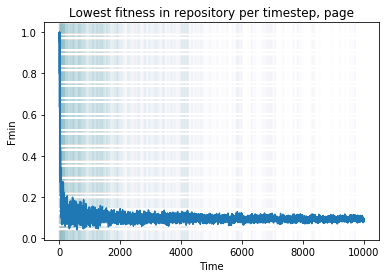

In [142]:
# plot_fitness(data_MSR, 'MSR')
# plot_fitness(data_with, 'with rec')
# plot_fitness(data_mult, 'with mult')
# plot_fitness(data_without, 'without rec')
plot_fitness(data_page, 'page')

Plot lowest fitness at each commit timepoint

In [18]:
def plot_commits(data, name, f0=.5):
    commits = find_commits(data, f0)    
    plt.scatter(range(len(commits)), data['fmin'].loc[commits], s=3)
    plt.title('Lowest fitness in repository per commit, '+name)
    plt.xlabel('Commit')
    plt.ylabel('Fmin')
    plt.show()
    
def plot_commitsteps(data, name, log=True, f0=.5):
    counter = 0
    commits = find_commits(data, f0)
    if len(commits)>0:
        commitsteps = [commits[0]] + [commits[i]-commits[i-1] for i in range(1, len(commits))]
        commitsteps = np.array(commitsteps)

        plt.scatter(range(len(commitsteps)), commitsteps,label=name, s=5, alpha=.2, c='green')
    if log:
        plt.yscale('log')
    plt.title('Steps per commit, '+name)
    plt.show()
    
    


In [ ]:
plot_commits(data_MSR, 'MSR')
plot_commitsteps(data_MSR, 'MSR')

plot_commits(data_with, 'with rec')
plot_commitsteps(data_with, 'with rec')

plot_commits(data_mult, 'with mult')
plot_commitsteps(data_mult, 'with mult', log=False)

plot_commits(data_without, 'without rec')
plot_commitsteps(data_without, 'without rec', log=False)


Plot the lowest fitness at each commit, using timestep xscale

In [ ]:
def plot_commitstep(data, name, f0=.5):
    commits = find_commits(data, f0)    
    plt.scatter(commits, data['fmin'].loc[commits], s=1)
    plt.title('Lowest fitness in a commit per step, '+name)
    plt.xlabel('Commit')
    plt.ylabel('Fmin')
    plt.show()

In [ ]:
plot_commitstep(data_MSR, 'MSR')
plot_commitstep(data_with, 'with rec')
plot_commitstep(data_mult, 'with mult')
plot_commitstep(data_without, 'without rec')

Steps per commit

In [ ]:
def plot_stepsizes(datas, colors, f0=.5):
    counter = 0
    for data in datas:
    
        commits = find_commits(datas[data], f0)
        if len(commits)>0:
            commitsteps = [commits[0]] + [commits[i]-commits[i-1] for i in range(1, len(commits))]
            commitsteps = np.array(commitsteps)

            plt.plot(range(len(commitsteps)), commitsteps, c=colors[data],label=data)

            counter += 1

            plt.title('Number of steps per commit')
            plt.xlabel('Commit')
            plt.ylabel('Steps per commit')
    #         plt.yscale('log')
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    


In [ ]:
plot_stepsizes(datas, colors)   


In [ ]:
def scatter_stepsizes(datas, colors, f0=.5):
    counter = 0
    for data in datas:
    
        commits = find_commits(datas[data], f0)
        if len(commits)>0:
            commitsteps = [commits[0]] + [commits[i]-commits[i-1] for i in range(1, len(commits))]
            commitsteps = np.array(commitsteps)

            plt.scatter(counter, commitsteps.mean(), c=colors[data], label=data)
    #         plt.scatter(counter, commitsteps.mean()-commitsteps.std(), c=colors[data], alpha=.5, label='std')
    #         plt.scatter(counter, commitsteps.mean()+commitsteps.std(), c=colors[data], alpha=.5)
    #         plt.scatter(counter, commitsteps.min(), c=colors[data], alpha=.3, label='min/max')
    #         plt.scatter(counter, commitsteps.max(), c=colors[data], alpha=.3, label='')

            counter += 1

    plt.title('Number of steps per commit')
    plt.xlabel('Exp. condition')
    plt.ylabel('Steps per commit')
    plt.xticks(range(len(datas)), list(datas), rotation='vertical')
#     plt.yscale('log')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    


In [ ]:

# datas = {'MSR':data_MSR, 'with rec':data_with}
scatter_stepsizes(datas, colors)   


Correlation between commit steps and fmin at the commit

In [ ]:
import scipy.stats
def corr_fmin_steps(data, f0=.5):
    commits = find_commits(data, f0)    
    fmins = data['fmin'].loc[commits]
    if len(commits)>0:
        commitsteps = [commits[0]] + [commits[i]-commits[i-1] for i in range(1, len(commits))]
        return scipy.stats.pearsonr(fmins, commitsteps)

print('pearsons coefficient and pvalue')
for data in datas:
    print(data, corr_fmin_steps(datas[data]))

In [ ]:
def scatter_stepsizes_fmin(datas, colors, f0=.5):
    counter = 0
    for data in datas:
#         if data == 'with mult':
        if True:
            commits = find_commits(datas[data], f0)
            if len(commits)>0:
                commitsteps = [commits[0]] + [commits[i]-commits[i-1] for i in range(1, len(commits))]
                commitsteps = np.array(commitsteps)
        #         print(datas[data])
                plt.scatter(datas[data]['fmin'].loc[commits], commitsteps, c=colors[data], label=data)

                counter += 1

                plt.title('Number of steps per commit')
                plt.xlabel('fmin')
                plt.ylabel('Steps per commit')
        #         plt.xticks(range(len(datas)), list(datas), rotation='vertical')
                plt.yscale('log')
    #             plt.ylim([0,100])
    #             print(commitsteps)
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.show()

    


In [ ]:
scatter_stepsizes_fmin(datas, colors)   


Info on the last action before a commit

In [ ]:
print('used proportions:\n', 
    'update_method, 0.45\n',
    'call_method, 0.4\n',
    'delete_method, 0.05\n',
         'create_method, 0.1\n',
    'create_class, 0.1\n')
# Plot the used probabilities
used_props = [.45, .4, .05, .1]
for i in range(len(used_props)):
    if i ==0:
        plt.scatter(i, used_props[i], c='black', label='probs')
    else:
        plt.scatter(i, used_props[i], c='black')

def action_info(data, name,colors, f0=.5):
    
    # Print propotions
    print(name)
    commits = find_commits(data, f0)        
    print('number of commits', len(commits))

    print(data['action'].loc[commits].value_counts()/len(commits))
    print()
    
    # Plot the proportions in scatter plot
    counts = data['action'].loc[commits].value_counts()
    for i in range(len(counts)):
        if i ==0:
            plt.scatter(i, counts[i]/len(commits), c=colors[name], label=name)
        else:
            plt.scatter(i, counts[i]/len(commits), c=colors[name])


# action_info(data_MSR, 'MSR')
action_info(data_with, 'with rec', colors)
action_info(data_mult, 'with mult', colors)
action_info(data_without, 'without rec',colors)

plt.title('Proportions of last actions per commit')
plt.xlabel('Action')
plt.ylabel('Proportion')
plt.xticks([0,1,2,3], ['update', 'call', 'remove', 'create'], rotation='vertical')
plt.legend()
plt.show()

## Stats on fitness

In [ ]:
def plot_stats(data_stats):
    plt.plot(data_stats['fmean'], label='fmean')
    plt.plot(data_stats['fmean']+data_stats['fstd'], c='orange', alpha=.3, label='std')
    plt.plot(data_stats['fmean']-data_stats['fstd'], c='orange', alpha=.3)
    plt.plot(data_stats['fmin'], c='green', alpha=.3, label='min/max')
    plt.plot(data_stats['fmax'], c='green', alpha=.3, label='')

    plt.title('Mean fitness of all methods')
    plt.xlabel('Time')
    plt.ylabel('Fitness')
    plt.legend()
    plt.show()


    plt.plot(data_stats['fnum'])
    plt.ylabel('Number of methods')
    plt.xlabel('Time')
    plt.title('Number of methods over time')

In [ ]:
# Without recursion
plot_stats(data_stats)

In [ ]:
# With recursion
plot_stats(data_with)